# CGPA Based on Grades of Students 

## Problem Statement:
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

## Few Details of Data Set:

There are total 43 columns
Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

## Requirement
Predict: CGPA of a student based on different grades in four years.

In [91]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [92]:
df_grades=pd.read_csv("grades.csv")
df_grades

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [93]:
df_grades.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

Obs- The course codes are in the format AB-XXX where AB are alphabets representing candidates departments and XXX are numbers where first X represents the year the canditate took examThus , we can say:
   * student had 11 subjects in First year,second year and third year
   * student had 8 subjects in fourth year    

## Starting the EDA

In [94]:
df_grades.shape

(571, 43)

In [95]:
#Checking for data types of all columns
df_grades.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

Obs- We can see, except for CGPA, all other columns are object type, so will be encoding it later

In [96]:
#Checking for null values
df_grades.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

Obs-We can see there are null values in many columns, thus we will be treating it later

In [7]:
#Checking the number of unique values in all columns
df_grades.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [8]:
df_grades.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


Obs- We can see mean is less than median in the output column, that means the data is left skewed

### Data Visualization

##### Univariate Analysis

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


<AxesSubplot:xlabel='PH-121', ylabel='count'>

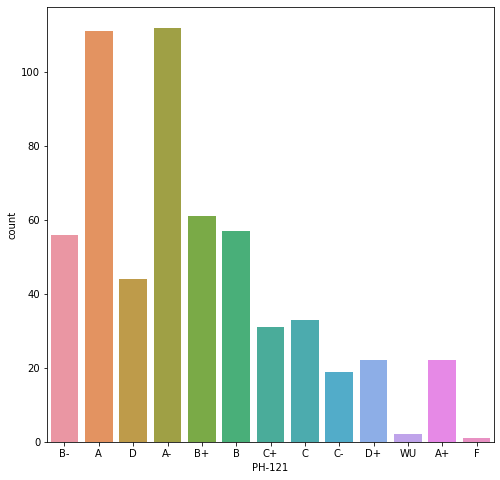

In [9]:
#countplot for few subjects and their grades
plt.figure(figsize=(8,8))
print(df_grades["PH-121"].value_counts())
sns.countplot(x="PH-121", data=df_grades)

Obs- We can see many students have scored maximum grades(A,A-) in subject Physics and a very few who failed or were absent

A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


<AxesSubplot:xlabel='MT-111', ylabel='count'>

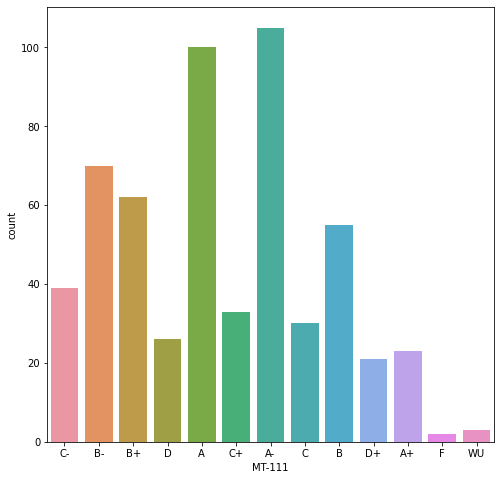

In [10]:
plt.figure(figsize=(8,8))
print(df_grades["MT-111"].value_counts())
sns.countplot(x="MT-111", data=df_grades)

Obs- We can see many students have scored maximum grades(A,A-) in subject MT-111 and a very few who failed or were absent

A-    150
A     118
B      97
B+     89
B-     36
C+     33
C      15
C-     11
D+      9
D       3
A+      2
F       2
WU      1
Name: HS-205/20, dtype: int64


<AxesSubplot:xlabel='HS-205/20', ylabel='count'>

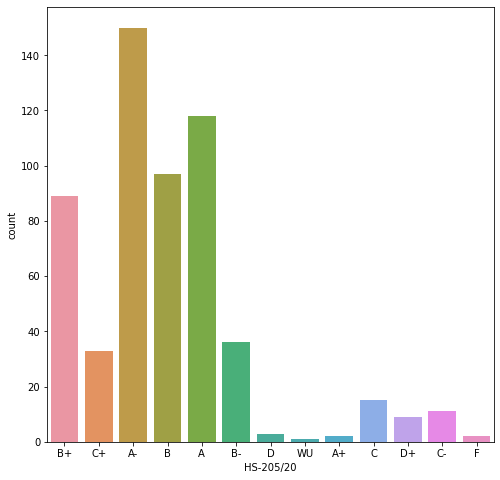

In [11]:
plt.figure(figsize=(8,8))
print(df_grades["HS-205/20"].value_counts())
sns.countplot(x="HS-205/20", data=df_grades)

Obs- We can see many students have scored maximum grades(A,A-) in subject HS and a very few who failed or were absent

A-    101
B+     86
B      81
B-     65
C      44
A      43
D+     36
C+     35
C-     35
D      33
A+      4
WU      2
Name: CS-212, dtype: int64


<AxesSubplot:xlabel='CS-212', ylabel='count'>

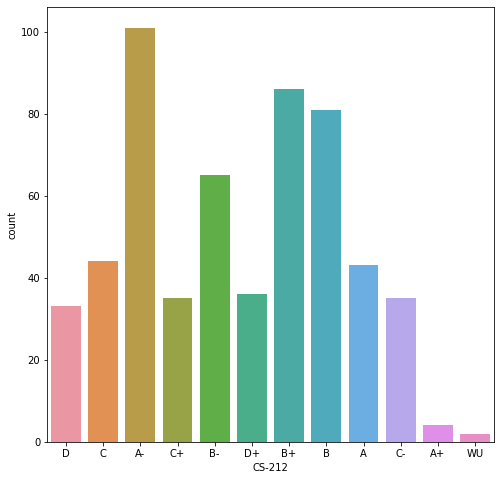

In [12]:
plt.figure(figsize=(8,8))
print(df_grades["CS-212"].value_counts())
sns.countplot(x="CS-212", data=df_grades)

Obs- We can see many students have scored maximum grades(A-,B+,B) in subject CS and none who failed and very few were absent

A     118
A-    103
B+     64
B      57
B-     46
C-     32
D+     31
A+     30
C      28
C+     27
D      22
F       4
Name: MT-331, dtype: int64


<AxesSubplot:xlabel='MT-331', ylabel='count'>

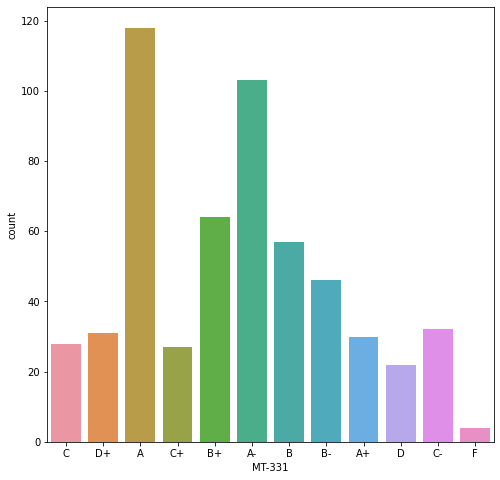

In [13]:
plt.figure(figsize=(8,8))
print(df_grades["MT-331"].value_counts())
sns.countplot(x="MT-331", data=df_grades)

Obs- We can see many students have scored maximum grades(A,A-) in subject MT and a very few who failed and none were absent

A-    113
B     102
A      86
B+     81
B-     60
C+     32
C      28
D      21
C-     19
D+     10
A+      9
Name: CS-302, dtype: int64


<AxesSubplot:xlabel='CS-302', ylabel='count'>

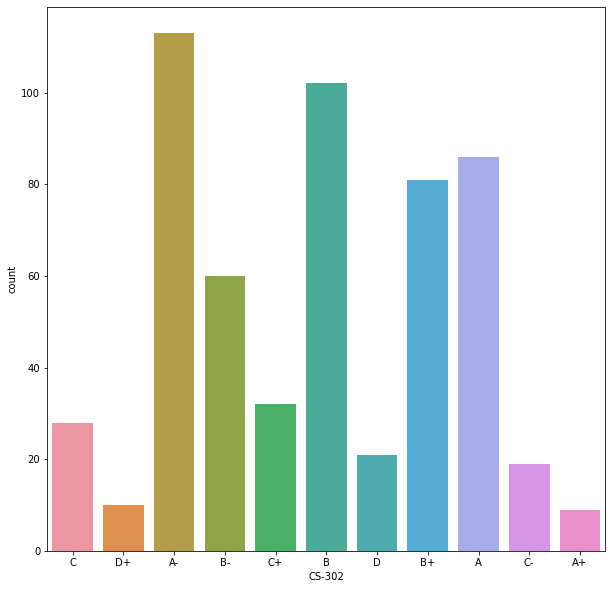

In [97]:
plt.figure(figsize=(10,10))
print(df_grades["CS-302"].value_counts())
sns.countplot(x="CS-302", data=df_grades)


Obs-We can see many students have scored maximum grades(A,B) in subject CS and none failed or were absent

A     133
A-    106
B+     62
B-     55
B      54
D+     35
C      33
C+     32
C-     30
A+     15
D       4
Name: CS-403, dtype: int64


<AxesSubplot:xlabel='CS-403', ylabel='count'>

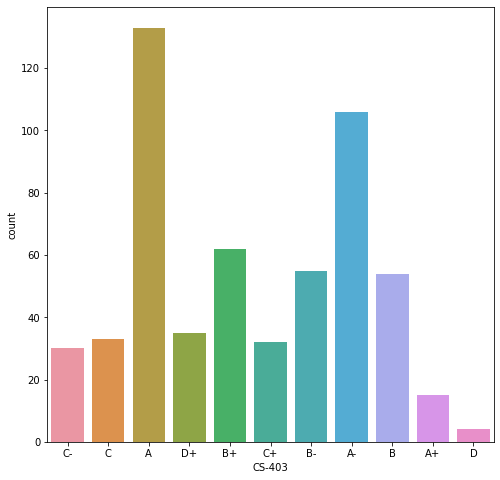

In [15]:
plt.figure(figsize=(8,8))
print(df_grades["CS-403"].value_counts())
sns.countplot(x="CS-403", data=df_grades)

Obs- We can see many students have scored maximum grades(A,A-) in subject CS and none who failed or were absent

A-    120
B      89
B+     85
B-     78
A      56
C+     46
C      40
C-     20
D+     13
D       7
A+      2
F       2
Name: CS-419, dtype: int64


<AxesSubplot:xlabel='CS-419', ylabel='count'>

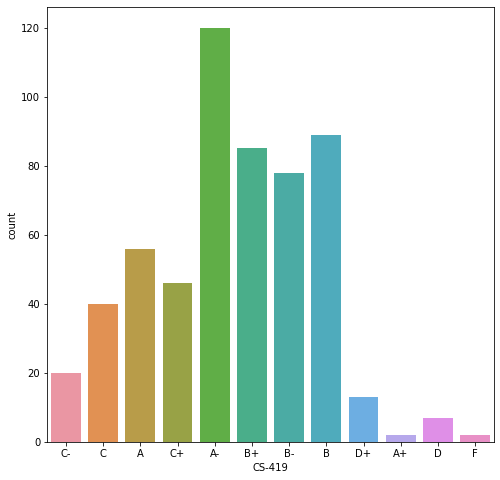

In [16]:
plt.figure(figsize=(8,8))
print(df_grades["CS-419"].value_counts())
sns.countplot(x="CS-419", data=df_grades)

Obs- We can see many students have scored maximum grades(A,B) in subject CS and a very few who failed and none were absent

### Data Cleaning and Pre-Processing

#### Encoding Categorical Data

In [99]:
from sklearn.preprocessing import LabelEncoder
cols=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412']
le=LabelEncoder()
df_grades[cols]=df_grades[cols].apply(le.fit_transform)
df_grades

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,CS-97002,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,CS-97003,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,CS-97004,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,3,0,0,2,1,0,2,2,1,...,2,2,0,0,0,4,4,3,0,3.798
567,CS-97568,1,0,0,0,0,0,0,2,0,...,4,4,0,0,2,3,2,6,2,3.772
568,CS-97569,3,0,2,4,0,0,0,0,0,...,2,3,0,4,0,6,4,2,2,3.470
569,CS-97570,0,4,9,0,9,10,5,8,5,...,9,3,3,8,9,6,3,5,6,2.193


Obs- The grades encoded are as follows:

"A:0", "A+:1","A-:2","B:3","B+:4","B-:5","C:6","C+:7","C-:8","D:9","D+:10","F:11","WU:12"

#### Removing and filling Null Values 

#There were null values in many columns but only in few rows, so we willl be dropping that rows, But for columns "CS-406" and "CS-412", Null count =85,79 respectively, we will be imputing those rows with mean values

In [100]:
df_grades["CS-406"] = df_grades["CS-406"].fillna(df_grades["CS-406"].mean())
df_grades["CS-412"] = df_grades["CS-412"].fillna(df_grades["CS-412"].mean())

In [101]:
#Checking the null count for validation
df_grades["CS-406"].isnull().sum()

0

In [102]:
df_grades["CS-412"].isnull().sum()

0

Dropping Seat-No column since it is not important in analysing the CGPA 

In [103]:
df_grades.drop(columns='Seat No.',axis=1, inplace=True)

In [104]:
df_grades.shape

(571, 42)

In [105]:
# Deleting all other rows where null values are present
df_grades.dropna(inplace=True)

In [24]:
#Rechecking the null value count
df_grades.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

#### Univariate Analysis Contd..

<AxesSubplot:xlabel='CS-419', ylabel='Density'>

<Figure size 1440x2160 with 0 Axes>

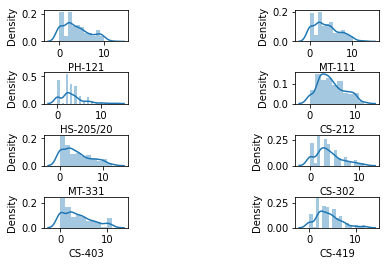

In [106]:
# Next, we will plot distribution plot of few columns in same figure(to check skewness)
plt.figure(figsize=(20,30))
fig, axes = plt.subplots(4,2)
fig.subplots_adjust(hspace=1, wspace=2)

sns.distplot(df_grades['PH-121'], ax=axes[0,0])
sns.distplot(df_grades['MT-111'], ax=axes[0,1])
sns.distplot(df_grades['HS-205/20'], ax=axes[1,0])
sns.distplot(df_grades['CS-212'], ax=axes[1,1])
sns.distplot(df_grades['MT-331'], ax=axes[2,0])
sns.distplot(df_grades['CS-302'], ax=axes[2,1])
sns.distplot(df_grades['CS-403'], ax=axes[3,0])
sns.distplot(df_grades['CS-419'], ax=axes[3,1])

Obs- We can observe skewness is present in all these columns and would be present in other columns too, so we will be treating the skewness later.

<AxesSubplot:xlabel='CS-419'>

<Figure size 1440x2160 with 0 Axes>

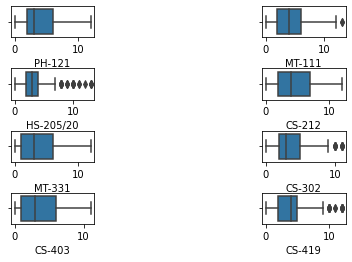

In [107]:
# Next, we will plot distribution plot of few columns in same figure(to check skewness)
plt.figure(figsize=(20,30))
fig, axes = plt.subplots(4,2)
fig.subplots_adjust(hspace=1, wspace=2)

sns.boxplot(df_grades['PH-121'], ax=axes[0,0])
sns.boxplot(df_grades['MT-111'], ax=axes[0,1])
sns.boxplot(df_grades['HS-205/20'], ax=axes[1,0])
sns.boxplot(df_grades['CS-212'], ax=axes[1,1])
sns.boxplot(df_grades['MT-331'], ax=axes[2,0])
sns.boxplot(df_grades['CS-302'], ax=axes[2,1])
sns.boxplot(df_grades['CS-403'], ax=axes[3,0])
sns.boxplot(df_grades['CS-419'], ax=axes[3,1])

Obs- We can see outliers are present in "PH-121","MT-111","CS-2","CS-419" columns and there might be outliers in other columns as well, so we will be treating it further.

### Checking Correlation

In [108]:
df_grades.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.565773,0.508231,0.487830,0.609990,0.319649,0.443420,0.589250,0.548820,...,0.140798,0.499998,0.410585,0.383521,0.429313,0.264933,0.529531,0.199127,0.563519,-0.663135
HS-101,0.382436,1.000000,0.334536,0.473146,0.441847,0.400713,0.321346,0.359801,0.323381,0.345819,...,0.244502,0.369839,0.265502,0.336850,0.103657,0.257124,0.309970,0.265646,0.251702,-0.537170
CY-105,0.565773,0.334536,1.000000,0.516758,0.554936,0.587845,0.404763,0.466034,0.501859,0.485183,...,0.381171,0.539259,0.578483,0.482884,0.223139,0.206669,0.551183,0.267375,0.360315,-0.670190
HS-105/12,0.508231,0.473146,0.516758,1.000000,0.505049,0.493581,0.516214,0.373136,0.425518,0.334125,...,0.337579,0.514041,0.512334,0.484061,0.184283,0.242515,0.518199,0.313219,0.267519,-0.627644
MT-111,0.487830,0.441847,0.554936,0.505049,1.000000,0.416784,0.528063,0.568940,0.422151,0.478874,...,0.534544,0.581354,0.490726,0.577514,0.101744,0.327353,0.558593,0.470404,0.224883,-0.756109
CS-105,0.609990,0.400713,0.587845,0.493581,0.416784,1.000000,0.310666,0.377496,0.522205,0.464978,...,0.147291,0.421923,0.362033,0.325876,0.379277,0.231224,0.383126,0.142609,0.448979,-0.613169
CS-106,0.319649,0.321346,0.404763,0.516214,0.528063,0.310666,1.000000,0.365975,0.304044,0.317611,...,0.519912,0.458346,0.506503,0.471248,0.033116,0.231097,0.490585,0.410040,0.114769,-0.563178
EL-102,0.443420,0.359801,0.466034,0.373136,0.568940,0.377496,0.365975,1.000000,0.464624,0.492613,...,0.396578,0.515770,0.406288,0.461098,0.103903,0.362837,0.470345,0.463383,0.256816,-0.669536
EE-119,0.589250,0.323381,0.501859,0.425518,0.422151,0.522205,0.304044,0.464624,1.000000,0.575298,...,0.224754,0.472092,0.409814,0.420696,0.341455,0.299075,0.512645,0.318122,0.427765,-0.668787
ME-107,0.548820,0.345819,0.485183,0.334125,0.478874,0.464978,0.317611,0.492613,0.575298,1.000000,...,0.281174,0.504715,0.416972,0.428022,0.259143,0.272818,0.511910,0.315812,0.412971,-0.677342


<AxesSubplot:>

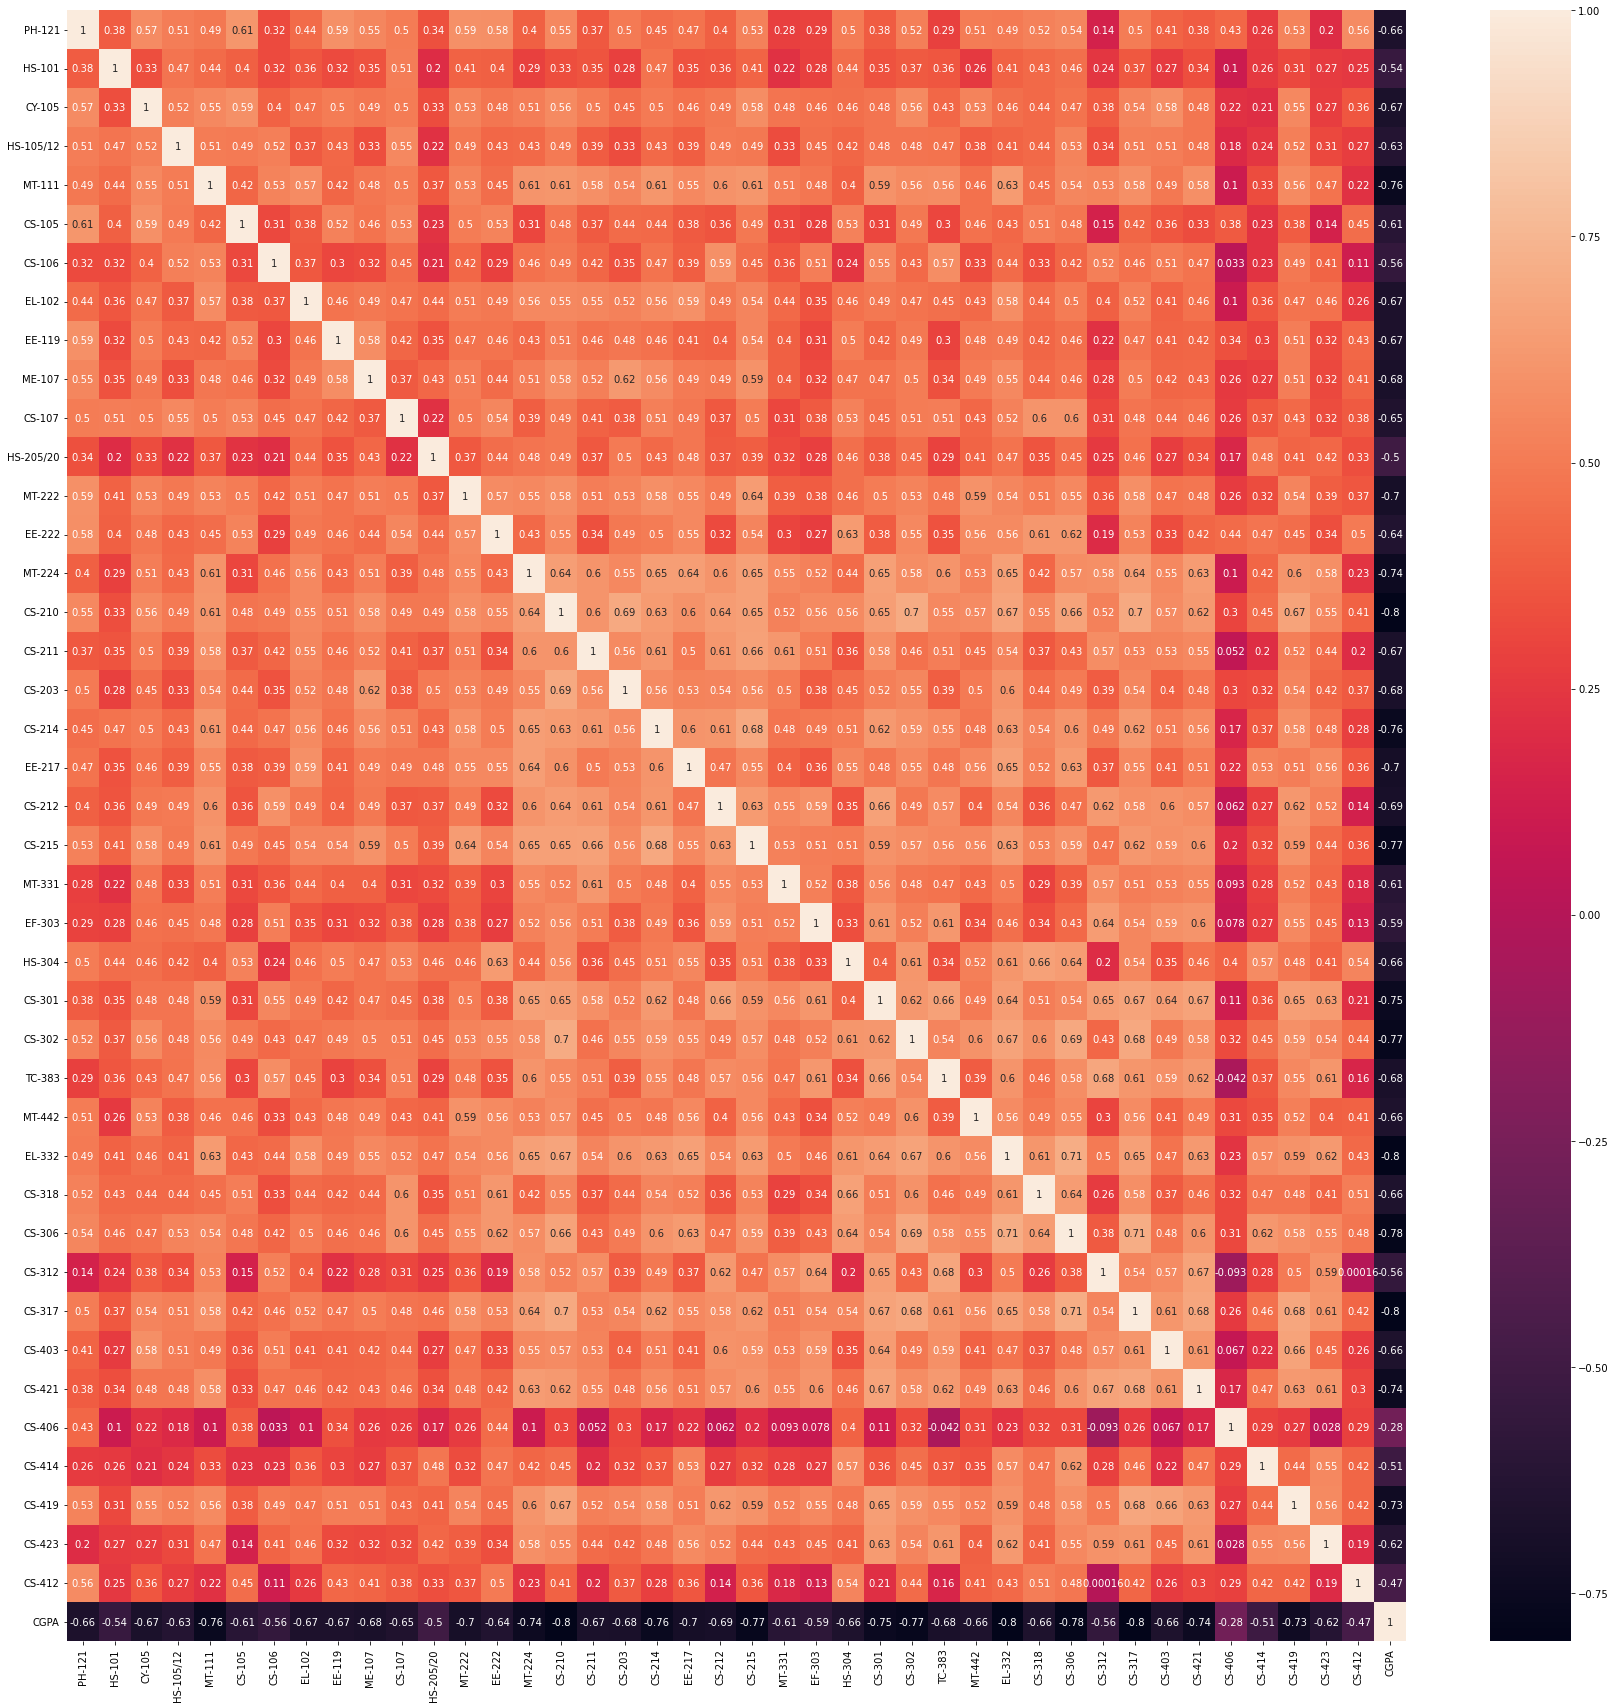

In [109]:
#displaying Correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df_grades.corr(),annot=True)

Obs- We can see all the columns are negatively correlated with the target column, and no two columns are strongly correlated with each other, thus multi-collinearity is not present.

### Data Transformation

#### Checking for Skewness

In [111]:
df_grades.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       1.001752
HS-105/12    0.337649
MT-111       0.520916
CS-105       0.930769
CS-106       0.682923
EL-102       0.532311
EE-119       0.607213
ME-107       0.131791
CS-107       0.456184
HS-205/20    1.155648
MT-222       0.267531
EE-222       0.864582
MT-224       0.566537
CS-210       0.966469
CS-211       0.202623
CS-203       0.337821
CS-214       0.120394
EE-217       0.876835
CS-212       0.459739
CS-215       0.288215
MT-331       0.674150
EF-303       0.547945
HS-304       0.814333
CS-301       0.489045
CS-302       0.697409
TC-383       0.379712
MT-442       0.970582
EL-332       0.587335
CS-318       0.511718
CS-306       0.575364
CS-312       0.561465
CS-317       0.273812
CS-403       0.638689
CS-421       0.317459
CS-406       1.105583
CS-414       1.592209
CS-419       0.773674
CS-423       0.627219
CS-412       1.086028
CGPA        -0.497203
dtype: float64

We can see data is skewed in many columns "CY-105","CS-105","CS-106","EE-119","HS-205/20","EE-222","CS-210","EE-217","MT-331","HS-304","CS-302","MT-442","CS-403","CS-406","CS-414","CS-419","CS-423","CS-412"

Transforming the data and re-checking the skewness

#### Applying Transformation Method

In [113]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() #deafault method=boxcox

skew_col = ["CY-105","CS-105","CS-106","EE-119","HS-205/20","EE-222","CS-210","EE-217","MT-331","HS-304","CS-302","MT-442","CS-403","CS-406","CS-414","CS-419","CS-423","CS-412"]
df_grades[skew_col]= pt.fit_transform(df_grades[skew_col].values)

In [114]:
df_grades.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.029825
HS-105/12    0.337649
MT-111       0.520916
CS-105       0.022592
CS-106      -0.032774
EL-102       0.532311
EE-119      -0.015615
ME-107       0.131791
CS-107       0.456184
HS-205/20    0.061450
MT-222       0.267531
EE-222       0.007766
MT-224       0.566537
CS-210       0.025581
CS-211       0.202623
CS-203       0.337821
CS-214       0.120394
EE-217       0.013186
CS-212       0.459739
CS-215       0.288215
MT-331      -0.001824
EF-303       0.547945
HS-304      -0.013567
CS-301       0.489045
CS-302       0.006323
TC-383       0.379712
MT-442       0.009723
EL-332       0.587335
CS-318       0.511718
CS-306       0.575364
CS-312       0.561465
CS-317       0.273812
CS-403       0.004230
CS-421       0.317459
CS-406      -0.045037
CS-414       0.066654
CS-419       0.003618
CS-423      -0.004580
CS-412      -0.034709
CGPA        -0.497203
dtype: float64

Obs- We can see the skewness has come within the acceptable range after the power transformation

### Checking for outliers

In [115]:
# Method 1: Z-score
from scipy.stats import zscore
z=np.abs(zscore(df_grades))
threshold=3
print(np.where(z>3))

(array([143, 281, 288, 565], dtype=int64), array([41, 41, 41, 41], dtype=int64))


Obs-From the box plot, we already visualized outliers were present in multiple columns.

Here it is exactly showing the locations where outliers are present, removing these locations data further

In [116]:
df_grades_new=df_grades[(z<3).all(axis=1)]

In [117]:
print("df_grades.shape:",df_grades.shape, "\ndf_grades_new.shape:",df_grades_new.shape)

df_grades.shape: (571, 42) 
df_grades_new.shape: (567, 42)


In [118]:
# Let's check the the data loss
data_loss = (571-567)/571*100
data_loss

0.7005253940455342

In [120]:
# Method 2: IQR(Inter Quartile) Method
Q1=df_grades.quantile(0.25)
Q3=df_grades.quantile(0.75)
IQR=Q3 - Q1

df_grades_new2=df_grades[~((df_grades < (Q1 - 1.5 * IQR)) |(df_grades > (Q3 + 1.5 * IQR))).any(axis=1)]

In [121]:
print("df_grades.shape:",df_grades.shape, "\ndf_grades_new2.shape:",df_grades_new2.shape)

df_grades.shape: (571, 42) 
df_grades_new2.shape: (428, 42)


In [122]:
# Let's check the the data loss
data_loss = (571-428)/571*100
data_loss

25.04378283712785

Obs- The Data Loss in IQR method is more, so we will be going with Z-score method

In [123]:
df_grades=df_grades_new # Assigning back the new created dataframe
df_grades.shape

(567, 42)

### Creating Input(Predictor) and Output(Target) Columns

In [124]:
x=df_grades.drop(columns=['CGPA'],axis=1)
y=df_grades['CGPA']

In [41]:
x.shape

(567, 41)

In [125]:
y.shape

(567,)

### Data Scaling

In [126]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scale=st.fit_transform(x)
x_scale

array([[ 0.42096781,  1.79298088,  1.45210291, ...,  1.42077602,
        -0.24902311, -0.48304112],
       [-1.24352833,  1.43145166,  1.72453752, ...,  0.81514   ,
         0.70174853, -0.11535698],
       [-1.24352833, -0.73772364, -1.26201177, ..., -1.95220221,
        -0.63923431, -1.76261362],
       ...,
       [-0.24483065, -1.82231129,  0.03008403, ...,  0.11860006,
        -0.63923431, -0.48304112],
       [-1.24352833, -0.37619442,  1.59469043, ..., -0.28020986,
         0.41117572,  0.64077422],
       [ 0.75386703,  1.43145166,  1.59469043, ...,  0.11860006,
         1.46971551,  0.99902572]])

In [127]:
x=pd.DataFrame(data=x_scale)

### Data Modelling
We will make two models:
* 1.Without PCA (Even though there are many columns in the dataset, but still I feel marks in every subject cannot be correlated with each other as every student can have different expertise.)
* 2. Using PCA(to remove curse of dimensionality)

### Model1(Without PCA)

#### Finding Best Random State

In [128]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [175]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9676997283669325  on Random_state  172


#### Splitting data into Train-Test

In [180]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=172)

In [181]:
x_train.shape

(396, 41)

In [182]:
y_train.shape

(396,)

In [183]:
x_test.shape

(171, 41)

In [135]:
y_test.shape

(171,)

### Using various Machine Learning Algorithms

#### 1. Linear Regression

In [184]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.9414211134949567

In [185]:
predlr=lr.predict(x_test)
print("r2_score=",r2_score(y_test,predlr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predlr))
print("Mean Squared Error:",mean_squared_error(y_test,predlr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predlr)))

r2_score= 0.9676997283669325 

Mean Absolute Error: 0.08120836270905112
Mean Squared Error: 0.011295521863581197
Root Meand Squared Error: 0.10628039265820012


#### 2. Support Vector Regressor

In [186]:
svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

0.9868726031105287

In [187]:
predsvr=svr.predict(x_test)
print("r2_score=",r2_score(y_test,predsvr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predsvr))
print("Mean Squared Error:",mean_squared_error(y_test,predsvr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predsvr)))

r2_score= 0.9738644820121619 

Mean Absolute Error: 0.06841598214540497
Mean Squared Error: 0.009139685207644459
Root Meand Squared Error: 0.09560170086167118


#### 3. Decision Tree Regressor

In [188]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

1.0

In [189]:
preddtr=dtr.predict(x_test)
print("r2_score=",r2_score(y_test,preddtr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,preddtr))
print("Mean Squared Error:",mean_squared_error(y_test,preddtr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,preddtr)))

r2_score= 0.8018791141729043 

Mean Absolute Error: 0.19294736842105262
Mean Squared Error: 0.06928359064327486
Root Meand Squared Error: 0.2632177627806962


#### 4. K Neighbors Regressor

In [190]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
knr.score(x_train,y_train)

0.9689172731617635

In [191]:
predknr=knr.predict(x_test)
print("r2_score=",r2_score(y_test,predknr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predknr))
print("Mean Squared Error:",mean_squared_error(y_test,predknr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predknr)))

r2_score= 0.9736959137122928 

Mean Absolute Error: 0.07253450292397666
Mean Squared Error: 0.009198634152046787
Root Meand Squared Error: 0.09590951022733245


#### 5.Random Forest Regressor

In [192]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.9908597971082438

In [193]:
predrfr=rfr.predict(x_test)
print("r2_score=",r2_score(y_test,predrfr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predrfr))
print("Mean Squared Error:",mean_squared_error(y_test,predrfr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predrfr)))

r2_score= 0.9668920192650918 

Mean Absolute Error: 0.08093643274853796
Mean Squared Error: 0.011577980659064326
Root Meand Squared Error: 0.10760102536251374


#### 6.Ada Boost Regressor

In [194]:
adr=AdaBoostRegressor()
adr.fit(x_train,y_train)
adr.score(x_train,y_train)

0.9453148619524883

In [195]:
predadr=adr.predict(x_test)
print("r2_score=",r2_score(y_test,predadr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predadr))
print("Mean Squared Error:",mean_squared_error(y_test,predadr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predadr)))

r2_score= 0.9326438664125084 

Mean Absolute Error: 0.12912419440347536
Mean Squared Error: 0.02355468363321476
Root Meand Squared Error: 0.15347535187519448


#### 7.Gradient Boosting Regressor

In [196]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

0.9974084547429366

In [197]:
predgbr=gbr.predict(x_test)
print("r2_score=",r2_score(y_test,predgbr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predgbr))
print("Mean Squared Error:",mean_squared_error(y_test,predgbr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predgbr)))

r2_score= 0.9743797762764552 

Mean Absolute Error: 0.06896812121726931
Mean Squared Error: 0.008959484938909098
Root Meand Squared Error: 0.09465455582754112


### Regularization to overcome Over-Fitting (Lasso,Ridge)

In [198]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

#### 8. Lasso Regression

In [199]:
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.8737548762533658

In [200]:
predls=ls.predict(x_test)
print("r2_score=",r2_score(y_test,predls),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predls))
print("Mean Squared Error:",mean_squared_error(y_test,predls))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predls)))

r2_score= 0.8969430687282489 

Mean Absolute Error: 0.15616754479062347
Mean Squared Error: 0.03603938176117121
Root Meand Squared Error: 0.18984041129636023


#### 9. Ridge Regression

In [201]:
rg=Ridge(alpha=0.1)
rg.fit(x_train,y_train)
rg.score(x_train,y_train)

0.941421105826728

In [202]:
predrg=rg.predict(x_test)
print("r2_score=",r2_score(y_test,predrg),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predrg))
print("Mean Squared Error:",mean_squared_error(y_test,predrg))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predrg)))

r2_score= 0.9677106749256968 

Mean Absolute Error: 0.0811888128013963
Mean Squared Error: 0.011291693812372876
Root Meand Squared Error: 0.10626238192499204


### Cross Validation

In [203]:
from sklearn.model_selection import cross_val_score

In [204]:
# cv score for 1. Logistic Regression 
print('CV score  for Linear Regression',cross_val_score(lr,x,y,cv=10).mean())

CV score  for Linear Regression 0.9344398017497084


In [205]:
# cv score for 2. Support Vector Regressor
print('CV score  for Support Vector Regressor',cross_val_score(svr,x,y,cv=10).mean())

CV score  for Support Vector Regressor 0.9591341165611136


In [206]:
# cv score for 3. Decision Tree Regressor
print('CV score  for Decision Tree Regressor',cross_val_score(dtr,x,y,cv=10).mean())

CV score  for Decision Tree Regressor 0.7984120251779834


In [208]:
# cv score for 4. K Neighbors Regressor
print('CV score  for K Neighbors Regressor',cross_val_score(knr,x,y,cv=10).mean())

CV score  for K Neighbors Regressor 0.9450314277388415


In [209]:
# cv score for 5.Random Forest Regressor
print('CV score  for Random Forest Regressor',cross_val_score(rfr,x,y,cv=10).mean())

CV score  for Random Forest Regressor 0.9350340188236398


In [210]:
# cv score for 6.Ada Boost Regressor
print('CV score  for Ada Boost Regressor',cross_val_score(adr,x,y,cv=10).mean())

CV score  for Ada Boost Regressor 0.9030579950149494


In [211]:
# cv score for 7.Gradient Boosting RegressorRegressor
print('CV score  for Gradient Boosting Regressor Regressor',cross_val_score(gbr,x,y,cv=10).mean())

CV score  for Gradient Boosting Regressor Regressor 0.9554394350290272


In [212]:
# cv score for 8. Lasso Regression 
print('CV score  for Lasso Regression',cross_val_score(ls,x,y,cv=10).mean())

CV score  for Lasso Regression 0.8616107292240744


In [214]:
# cv score for 9. Ridge Regression
print('CV score  for Ridge Regression',cross_val_score(rg,x,y,cv=10).mean())

CV score  for Ridge Regression 0.934446738489213


Obs- After comparing difference in Training Accuracy(Score)vsTesting Accuracy(r2_score)vs Cross Validation Score and also errors, we can say the best performing model is Support Vector Regressor(SVR)       

### Hyper Parameter Tuning

In [215]:
#Selecting few parameter list of SVR to pass in Gradient Boosting 
from sklearn.model_selection import GridSearchCV
parameters={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':['scale', 'auto'] }

In [216]:
#start the tuning
svr1=SVR()
GCV=GridSearchCV(svr1,parameters,cv=10)

GCV.fit(x_train,y_train)  
print(GCV.best_params_)         #printing the best parameter found by Gridsearchcv

{'gamma': 'scale', 'kernel': 'rbf'}


In [217]:
#Applying best parameter values on Support Vector Regressor Algorithm 
CGPAbest=SVR(gamma='scale', kernel='rbf')
CGPAbest.fit(x_train,y_train)
CGPAbest.score(x_train,y_train)

0.9868726031105287

In [218]:
predsvr1=CGPAbest.predict(x_test)
print("r2_score=",r2_score(y_test,predsvr1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predsvr1))
print("Mean Squared Error:",mean_squared_error(y_test,predsvr1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predsvr1)))

r2_score= 0.9738644820121619 

Mean Absolute Error: 0.06841598214540497
Mean Squared Error: 0.009139685207644459
Root Meand Squared Error: 0.09560170086167118


Obs- Our best model has given r2_score= 0.9738644820121619 and Mean Absolute Error= 0.06841598214540497

### Model2(Using PCA)

In [169]:
from sklearn.decomposition import PCA
pc=PCA(n_components=14)
x1=pc.fit_transform(x)
x1

array([[ 5.11742226, -1.10450708,  2.92577224, ..., -0.31055528,
         0.4984501 , -0.06227938],
       [ 5.77655227, -1.24346182,  0.16003424, ..., -1.68789334,
        -1.26227039,  1.30720852],
       [-5.49257753, -2.24012777, -0.09286713, ..., -0.86141065,
         1.32698242, -0.79337705],
       ...,
       [-3.55960476,  1.03682143, -1.90679069, ...,  0.10255901,
         0.44754517, -0.10774643],
       [ 4.03652105, -0.18502547, -0.65150524, ..., -1.62510121,
        -0.65187556, -0.14838277],
       [ 6.57011759,  0.93385049, -1.1860648 , ...,  0.12912677,
        -0.72507791,  0.06844995]])

In [173]:
x1=pd.DataFrame(x1)
x1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,5.117422,-1.104507,2.925772,-0.037529,-1.067145,0.079554,0.925067,-0.707415,0.694300,-0.836795,-0.543066,-0.310555,0.498450,-0.062279
1,5.776552,-1.243462,0.160034,0.274952,0.310961,-0.577987,0.791404,1.166400,2.067194,-0.557516,1.142397,-1.687893,-1.262270,1.307209
2,-5.492578,-2.240128,-0.092867,-1.689603,-0.799683,0.875440,-0.151689,-0.457306,0.098993,0.536697,-0.930946,-0.861411,1.326982,-0.793377
3,7.224340,-1.239559,0.700620,-0.312888,-0.296282,0.808202,-0.873609,0.377284,-0.822543,1.222281,0.515132,-0.202775,0.149373,0.068559
4,-3.362641,-2.488190,1.060057,-1.273759,1.042301,-1.952894,-0.110382,-0.222062,0.029091,0.462985,-0.860018,0.518065,0.128398,-1.116330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,-6.640611,-0.737767,-0.699700,-0.250906,0.013867,1.112885,-0.736948,0.787040,-0.659009,0.437784,0.393121,-0.379654,0.207512,0.032566
563,-6.655038,0.236269,-2.096153,0.636486,0.199056,0.254809,-2.026774,0.802804,0.184822,0.187466,0.477441,1.374896,0.646768,0.041066
564,-3.559605,1.036821,-1.906791,0.218191,1.082369,-0.185615,-1.040698,1.473342,1.678410,-1.388928,-0.622858,0.102559,0.447545,-0.107746
565,4.036521,-0.185025,-0.651505,1.534373,-0.063004,-1.061139,-0.751700,-0.471232,0.992313,0.236017,-0.151987,-1.625101,-0.651876,-0.148383


#### Finding Best Random State

In [171]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [220]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y,test_size=.30, random_state =i)
    lr = LinearRegression()
    lr.fit(x1_train, y1_train)
    pred = lr.predict(x1_test)
    acc=r2_score(y1_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.973191313789852  on Random_state  133


#### Splitting data into Train-Test

In [221]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y,test_size=0.30,random_state=133)

In [222]:
x1_train.shape

(396, 14)

In [223]:
y1_train.shape

(396,)

In [224]:
x1_test.shape

(171, 14)

In [225]:
y1_test.shape

(171,)

### Using various Machine Learning Algorithms

#### 1. Linear Regression

In [227]:
lr=LinearRegression()
lr.fit(x1_train,y1_train)
lr.score(x1_train,y1_train)

0.9272318307483377

In [229]:
predlr1=lr.predict(x1_test)
print("r2_score=",r2_score(y1_test,predlr1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predlr1))
print("Mean Squared Error:",mean_squared_error(y1_test,predlr1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predlr1)))

r2_score= 0.973191313789852 

Mean Absolute Error: 0.08068949234734316
Mean Squared Error: 0.01019652723495526
Root Meand Squared Error: 0.8416131081365377


#### 2. Support Vector Regressor

In [230]:
svr=SVR()
svr.fit(x1_train,y1_train)
svr.score(x1_train,y1_train)

0.9829795307064627

In [235]:
predsvr1=svr.predict(x1_test)
print("r2_score=",r2_score(y1_test,predsvr1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predsvr1))
print("Mean Squared Error:",mean_squared_error(y1_test,predsvr1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predsvr1)))

r2_score= 0.9637132857344888 

Mean Absolute Error: 0.06724932614107264
Mean Squared Error: 0.013801439853299053
Root Meand Squared Error: 0.1174795295074808


#### 3. Decision Tree Regressor

In [232]:
dtr1=DecisionTreeRegressor()
dtr.fit(x1_train,y1_train)
dtr.score(x1_train,y1_train)

1.0

In [236]:
preddtr1=dtr.predict(x1_test)
print("r2_score=",r2_score(y1_test,preddtr1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,preddtr1))
print("Mean Squared Error:",mean_squared_error(y1_test,preddtr1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,preddtr1)))

r2_score= 0.9491621249203888 

Mean Absolute Error: 0.0822046783625731
Mean Squared Error: 0.01933588888888889
Root Meand Squared Error: 0.13905354684037688


#### 4. K Neighbors Regressor

In [234]:
knr1=KNeighborsRegressor()
knr.fit(x1_train,y1_train)
knr.score(x1_train,y1_train)

0.9719799023525804

In [237]:
predknr1=knr.predict(x1_test)
print("r2_score=",r2_score(y1_test,predknr1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predknr1))
print("Mean Squared Error:",mean_squared_error(y1_test,predknr1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predknr1)))

r2_score= 0.9603163760333344 

Mean Absolute Error: 0.07360116959064329
Mean Squared Error: 0.015093434619883044
Root Meand Squared Error: 0.12285534021719627


#### 5.Random Forest Regressor

In [238]:
rfr=RandomForestRegressor()
rfr.fit(x1_train,y1_train)
rfr.score(x1_train,y1_train)

0.995170189750695

In [239]:
predrfr1=rfr.predict(x1_test)
print("r2_score=",r2_score(y1_test,predrfr1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predrfr1))
print("Mean Squared Error:",mean_squared_error(y1_test,predrfr1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predrfr1)))

r2_score= 0.9763518100767081 

Mean Absolute Error: 0.05747590643274857
Mean Squared Error: 0.00899445092982457
Root Meand Squared Error: 0.09483907912788152


#### 6.Ada Boost Regressor

In [240]:
adr=AdaBoostRegressor()
adr.fit(x1_train,y1_train)
adr.score(x1_train,y1_train)

0.9817186568045493

In [241]:
predadr1=adr.predict(x1_test)
print("r2_score=",r2_score(y1_test,predadr1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predadr1))
print("Mean Squared Error:",mean_squared_error(y1_test,predadr1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predadr1)))

r2_score= 0.9701161363512975 

Mean Absolute Error: 0.07292944974703434
Mean Squared Error: 0.011366153014404018
Root Meand Squared Error: 0.10661216166274849


#### 7.Gradient Boosting Regressor

In [243]:
gbr=GradientBoostingRegressor()
gbr.fit(x1_train,y1_train)
gbr.score(x1_train,y1_train)

0.9970677238362513

In [244]:
predgbr1=gbr.predict(x1_test)
print("r2_score=",r2_score(y1_test,predgbr1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predgbr1))
print("Mean Squared Error:",mean_squared_error(y1_test,predgbr1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predgbr1)))

r2_score= 0.9763403058105216 

Mean Absolute Error: 0.05483989809181668
Mean Squared Error: 0.008998826510282693
Root Meand Squared Error: 0.09486214476956914


### Regularization to overcome Over-Fitting (Lasso,Ridge)

#### 8. Lasso Regression

In [245]:
ls=Lasso(alpha=0.1)
ls.fit(x1_train,y1_train)
ls.score(x1_train,y1_train)

0.9121520554437147

In [246]:
predls1=ls.predict(x1_test)
print("r2_score=",r2_score(y1_test,predls1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predls1))
print("Mean Squared Error:",mean_squared_error(y1_test,predls1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predls1)))

r2_score= 0.9705192786738599 

Mean Absolute Error: 0.07781662610776993
Mean Squared Error: 0.011212820186403863
Root Meand Squared Error: 0.10589060480705483


#### 9. Ridge Regression

In [247]:
rg=Ridge(alpha=0.1)
rg.fit(x1_train,y1_train)
rg.score(x1_train,y1_train)

0.9272318286475518

In [248]:
predrg1=rg.predict(x1_test)
print("r2_score=",r2_score(y1_test,predrg1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predrg1))
print("Mean Squared Error:",mean_squared_error(y1_test,predrg1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predrg1)))

r2_score= 0.973195377100444 

Mean Absolute Error: 0.08068056125162147
Mean Squared Error: 0.010194981778501668
Root Meand Squared Error: 0.10097020242874463


### Cross Validation

In [252]:
# cv score for 1. Logistic Regression 
print('CV score  for Linear Regression',cross_val_score(lr,x1,y,cv=10).mean())

CV score  for Linear Regression 0.9335913454654703


In [253]:
# cv score for 2. Support Vector Regressor
print('CV score  for Support Vector Regressor',cross_val_score(svr,x1,y,cv=10).mean())

CV score  for Support Vector Regressor 0.9615935011635957


In [254]:
# cv score for 3. Decision Tree Regressor
print('CV score  for Decision Tree Regressor',cross_val_score(dtr,x1,y,cv=10).mean())

CV score  for Decision Tree Regressor 0.9535196444137514


In [255]:
# cv score for 4. K Neighbors Regressor
print('CV score  for K Neighbors Regressor',cross_val_score(knr,x1,y,cv=10).mean())

CV score  for K Neighbors Regressor 0.9530162492595509


In [256]:
# cv score for 5.Random Forest Regressor
print('CV score  for Random Forest Regressor',cross_val_score(rfr,x1,y,cv=10).mean())

CV score  for Random Forest Regressor 0.9659441192790121


In [257]:
# cv score for 6.Ada Boost Regressor
print('CV score  for Ada Boost Regressor',cross_val_score(adr,x1,y,cv=10).mean())

CV score  for Ada Boost Regressor 0.9637452072575327


In [258]:
# cv score for 7.Gradient Boosting RegressorRegressor
print('CV score  for Gradient Boosting Regressor Regressor',cross_val_score(gbr,x1,y,cv=10).mean())

CV score  for Gradient Boosting Regressor Regressor 0.9667175598125468


In [259]:
# cv score for 8. Lasso Regression 
print('CV score  for Lasso Regression',cross_val_score(ls,x1,y,cv=10).mean())

CV score  for Lasso Regression 0.9299225135822606


In [260]:
# cv score for 9. Ridge Regression
print('CV score  for Ridge Regression',cross_val_score(rg,x1,y,cv=10).mean())

CV score  for Ridge Regression 0.9335930809937537


Obs- After comparing difference in Training Accuracy(Score)vsTesting Accuracy(r2_score)vs Cross Validation Score and also errors, we can say the best performing model is Support Vector Regressor(SVR)

### Hyper Parameter Tuning

In [261]:
#Selecting few parameter list of SVR to pass in Gradient Boosting 
from sklearn.model_selection import GridSearchCV
parameters={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':['scale', 'auto'] }

In [262]:
#start the tuning
svr1=SVR()
GCV=GridSearchCV(svr1,parameters,cv=10)

GCV.fit(x_train,y_train)  
print(GCV.best_params_)   

{'gamma': 'scale', 'kernel': 'rbf'}


In [263]:
#Applying best parameter values on Support Vector Regressor Algorithm 
CGPApca=SVR(gamma='scale', kernel='rbf')
CGPApca.fit(x1_train,y1_train)
CGPApca.score(x1_train,y1_train)

0.9829795307064627

In [264]:
predsvr1=CGPApca.predict(x1_test)
print("r2_score=",r2_score(y1_test,predsvr1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predsvr1))
print("Mean Squared Error:",mean_squared_error(y1_test,predsvr1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predsvr1)))

r2_score= 0.9637132857344888 

Mean Absolute Error: 0.06724932614107264
Mean Squared Error: 0.013801439853299053
Root Meand Squared Error: 0.1174795295074808


#### Obs - We can see the model without PCA has given more accuracy and therefore considering that model

## Saving the best model

In [271]:
import joblib

joblib.dump(CGPAbest,'CGPA.obj')

['CGPA.obj']

In [272]:
CGPA_model=joblib.load('CGPA.obj')

In [273]:
CGPA_model

SVR()